In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [32]:
df = pd.read_excel("automobile_data.xlsx",sheet_name='data')
df.head()

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,...,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission
0,aj_01,2019-02-03 15:43:48,2008,8,No,Weak,NaN,NaN,NaN,NaN,...,NaN,NaN,Pickup Low,Starter Motor / Solenoid malfunctioning,NaN,NaN,NaN,Petrol + CNG,124600,3.0
1,aj_02,2019-01-16 13:02:12,2007,5,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,78108,4.0
2,aj_03,2019-02-09 13:31:04,2012,5,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diesel,93348,3.5
3,aj_04,2019-01-18 11:02:53,2013,1,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,48233,3.5
4,aj_05,2019-01-27 12:12:06,2011,7,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,74368,4.0


In [3]:
df.drop(['appointmentId','inspectionStartTime'],axis=1,inplace=True)

In [4]:
df.isna().sum()

year                                         0
month                                        0
engineTransmission_battery_value             0
engineTransmission_battery_cc_value_0    22869
engineTransmission_battery_cc_value_1    25877
                                         ...  
engineTransmission_comments_value_3      26248
engineTransmission_comments_value_4      26293
fuel_type                                    0
odometer_reading                             0
rating_engineTransmission                    0
Length: 71, dtype: int64

In [5]:
df.dropna(inplace=True,axis=1)

In [33]:
df.rename(columns={'rating_engineTransmission':'rating','engineTransmission_engineBlowByBackCompression_cc_value_0':'blowback_value'},inplace=True)

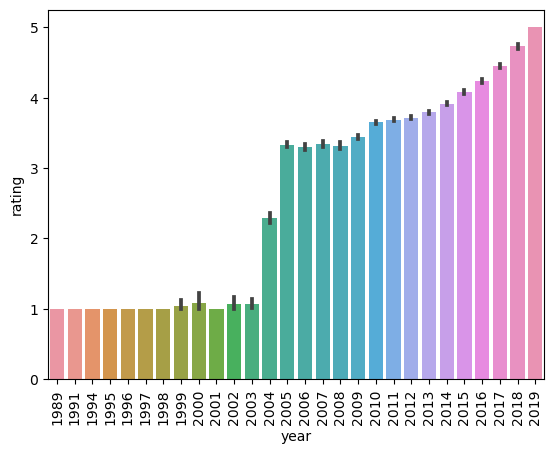

In [7]:
sns.barplot(x=df.year,y=df.rating);
plt.xticks(rotation=90);

<AxesSubplot:xlabel='fuel_type', ylabel='rating'>

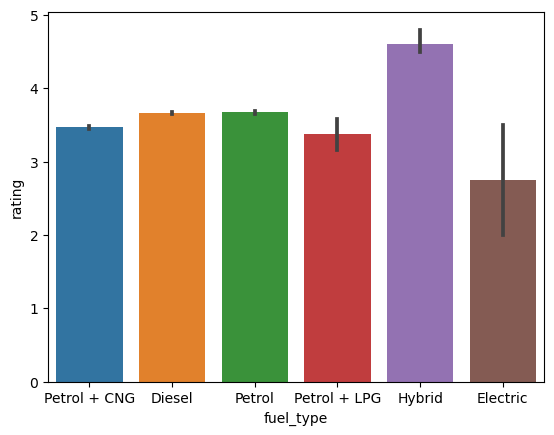

In [8]:
sns.barplot(x=df.fuel_type,y=df.rating)

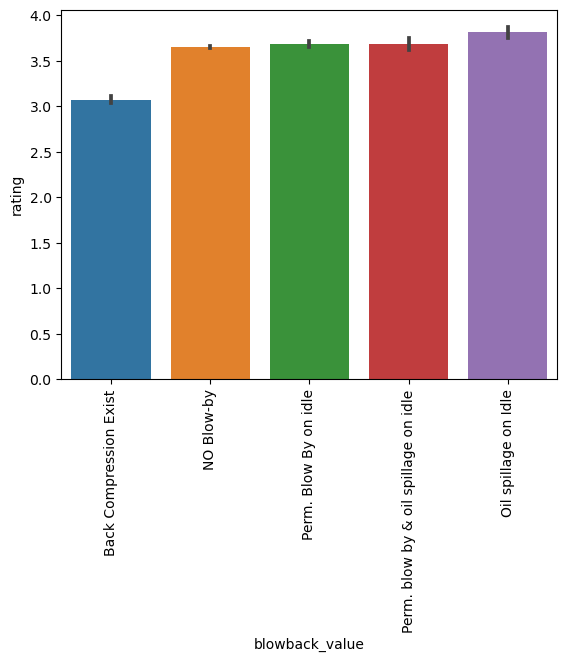

In [9]:
sns.barplot(x=df.blowback_value,y=df.rating);
plt.xticks(rotation=90);

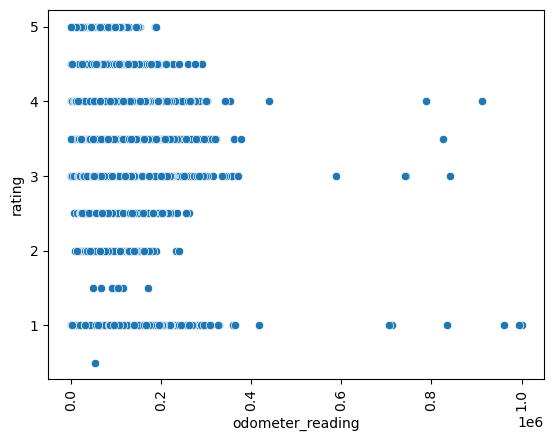

In [10]:
sns.scatterplot(x=df.odometer_reading,y=df.rating);
plt.xticks(rotation=90);

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26307 entries, 0 to 26306
Data columns (total 17 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   year                                                  26307 non-null  int64  
 1   month                                                 26307 non-null  int64  
 2   engineTransmission_battery_value                      26307 non-null  object 
 3   engineTransmission_engineoilLevelDipstick_value       26307 non-null  object 
 4   engineTransmission_engineOil                          26307 non-null  object 
 5   engineTransmission_engine_value                       26307 non-null  object 
 6   engineTransmission_coolant_value                      26307 non-null  object 
 7   engineTransmission_engineMounting_value               26307 non-null  object 
 8   engineTransmission_engineSound_value                  26

In [12]:
blowback_value_encoder = LabelEncoder()
fuel_type_encoder = LabelEncoder()

In [13]:
df['blowback_value'] = blowback_value_encoder.fit_transform(df['blowback_value'])
df['fuel_type'] = fuel_type_encoder.fit_transform(df['fuel_type'])
df['rating'] = df['rating'].astype(int)
df['rating'].replace(0,1,inplace=True)

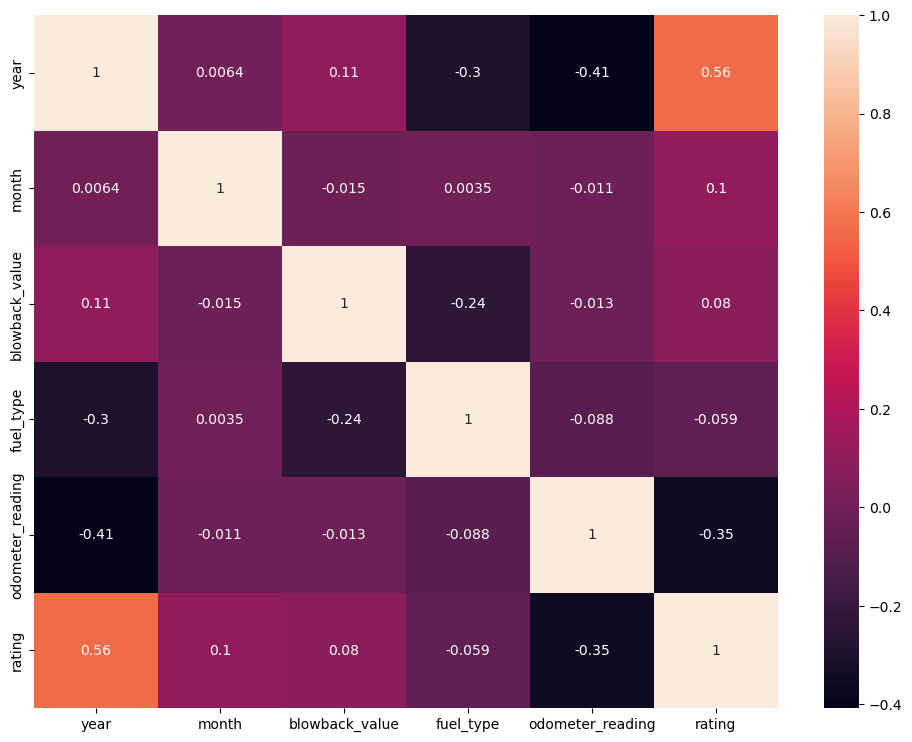

In [14]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True);

In [15]:
df.replace("Yes",1,inplace=True)
df.replace("No",0,inplace=True)

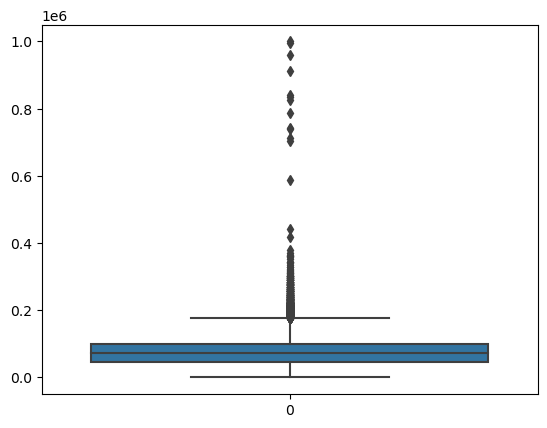

In [16]:
sns.boxplot(df.odometer_reading);

In [17]:
Q1 = np.percentile(df['odometer_reading'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(df['odometer_reading'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
 
# Upper bound
upper = np.where(df['odometer_reading'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['odometer_reading'] <= (Q1-1.5*IQR))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

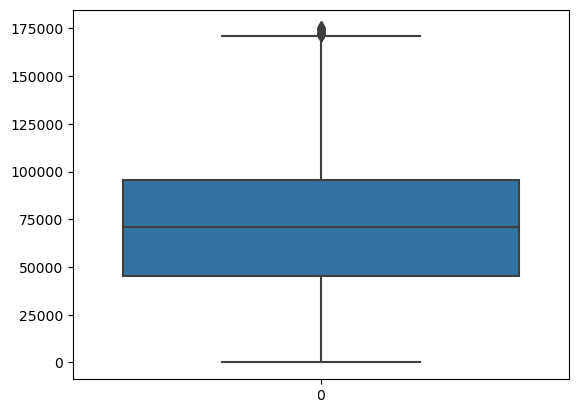

In [18]:
sns.boxplot(df.odometer_reading);

In [19]:
X = df.drop(['rating'],axis=1)
y = df['rating']

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [21]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6639312231340367

In [22]:
y_preds = model.predict(X_test)
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           1       0.97      0.88      0.92       309
           2       0.08      0.01      0.02       101
           3       0.63      0.67      0.65      2000
           4       0.66      0.67      0.67      2382
           5       0.63      0.62      0.62       326

    accuracy                           0.66      5118
   macro avg       0.60      0.57      0.58      5118
weighted avg       0.66      0.66      0.66      5118



In [23]:
import pickle
pickle.dump(blowback_value_encoder,open("blowback_encoder.pkl","wb"))
pickle.dump(fuel_type_encoder,open("fuel_encoder.pkl","wb"))
pickle.dump(model,open("rating_model.pkl","wb"))

In [35]:
df.blowback_value

0        Back Compression Exist
1                    NO Blow-by
2         Perm. Blow By on idle
3                    NO Blow-by
4                    NO Blow-by
                  ...          
26302                NO Blow-by
26303    Back Compression Exist
26304                NO Blow-by
26305                NO Blow-by
26306                NO Blow-by
Name: blowback_value, Length: 26307, dtype: object

In [31]:
df.engineTransmission_gearShifting_value.unique()

array([1, 0], dtype=int64)

In [36]:
blowback_encoder = pickle.load(open("blowback_encoder.pkl", "rb"))
